Cargar los datos
1. En una nueva libreta, en la plataforma Kaggle, importa los datos de la competencia 'Titanic - Machine Learning from Disaster'. A partit del archivo 'train.csv', crea un marco de datos 'passengers'. Imprime la
cabecera de este marco e inspecciona las columnas.






In [84]:
import pandas as pd

oTrainData = pd.read_csv('/content/train.csv')

print(oTrainData)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 


2. Menciona datos descriptivos de la fuente de información analizada: cantidad de datos, tipo de datos, rangos, y distribucinos observadas. ¿Que variables categóricas encuentras?



survival//	Survival	0 = No, 1 = Yes
pclass//	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex//	Sex
Age//	Age in years
sibsp//	# of siblings / spouses aboard the Titanic
parch//	# of parents / children aboard the Titanic
ticket//	Ticket number
fare//	Passenger fare
cabin//	Cabin number
embarked//	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

3. Proporciona un justificación para la siguiente respuesta ¿Qué características serías más útiles para predecir la supervivencia de un pasajero?



* Sex

Dependinedo si fueran hombres o mujeres, habia una clara preferencia a las mujeres en su supervivencia.

* Age

Las personas de mayor edad, tienen una menor prababilidad de supervivencia a comparacion de un hombre mas joven

* Pclass

Las mejroes clases tuvieron el privilegio de recibir atencion de manera mas rapida, y fueron los primeros de evacuar

* sibsp y parch

Pasajeros que hayan ido en grupo tenian mayor probabilidad para sobrevivir, ya que es mayor posibilidad que se recivieran atencion y ayuda.

* Cabin
Depende del numero de la cabina la distancia uqe tuvieron que recorrer para ser evacuados.

In [85]:
import pandas as pd

# Contar los valores faltantes en cada columna
missing_values = oTrainData.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

# Describir las variables numéricas para identificar posibles valores atípicos
print(oTrainData.describe())

Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
s

# **Limpiar los datos**

1. Analiza las variables relevantes que has considerado. ¿Cuales de ellas tienen problemas con información? (Datos faltantes, incorrectos).

Las que tienen problemas con la informacion son 3 principalmente:

Edad, Cabina y embarcacion

Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2

2. Dado el dicho, "las mujeres y los niños primero", el sexo y la edad parecen ser buenas características para predecir la supervivencia. Mapeemos los valores de texto en la columna Sex a un valor numérico. Actualice 'Sex' de modo que todos los valores femeninos se reemplacen con 1 y todos los valores masculinos se reemplacen con 0.

In [86]:
# Mapear 'female' a 1 y 'male' a 0 en la columna 'Sex'
oTrainData['Sex'] = oTrainData['Sex'].map({'female': 1, 'male': 0})

# Mostrar las primeras filas para confirmar el cambio
print(oTrainData.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  



3. Echemos un vistazo a la edad. Imprima passengers['Age'].values. Puede ver que tenemos varios valores faltantes, o nans. Rellene todos los valores de edad vacíos en pasajeros con la edad media.

In [87]:
# Mostrar los valores de la columna 'Age'
#print(oTrainData['Age'].values)

# Calcular la edad media, ignorando los valores faltantes
#mean_age = oTrainData['Age'].mean()

# Rellenar los valores faltantes en la columna 'Age' con la edad media
#print(oTrainData['Age'].fillna(mean_age, inplace=True))



4. Provee una gráfica de barras que permita observar la relación entre sobrevivientes y su género. ¿Observas alguna tendencia?

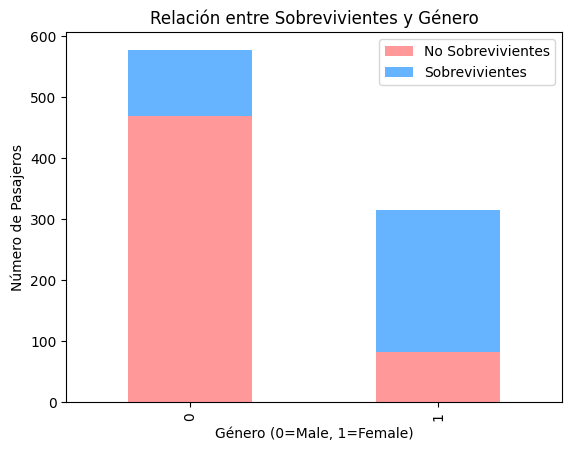

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
oTrainData = pd.read_csv('/content/train.csv')

# Mapear 'female' a 1 y 'male' a 0 en la columna 'Sex'
oTrainData['Sex'] = oTrainData['Sex'].map({'female': 1, 'male': 0})

# Rellenar los valores faltantes en la columna 'Age' con la edad media
mean_age = oTrainData['Age'].mean()
oTrainData['Age'].fillna(mean_age, inplace=True)

# Verificar que la columna 'Survived' exista en el DataFrame
if 'Survived' not in oTrainData.columns:
    raise ValueError("La columna 'Survived' no se encuentra en el DataFrame.")

# Agrupar por género y sobrevivencia para contar la cantidad de sobrevivientes y no sobrevivientes
survival_by_gender = oTrainData.groupby(['Sex', 'Survived']).size().unstack()

# Crear la gráfica de barras
survival_by_gender.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.xlabel('Género (0=Male, 1=Female)')
plt.ylabel('Número de Pasajeros')
plt.title('Relación entre Sobrevivientes y Género')
plt.legend(['No Sobrevivientes', 'Sobrevivientes'])
plt.show()


# Survival vs class

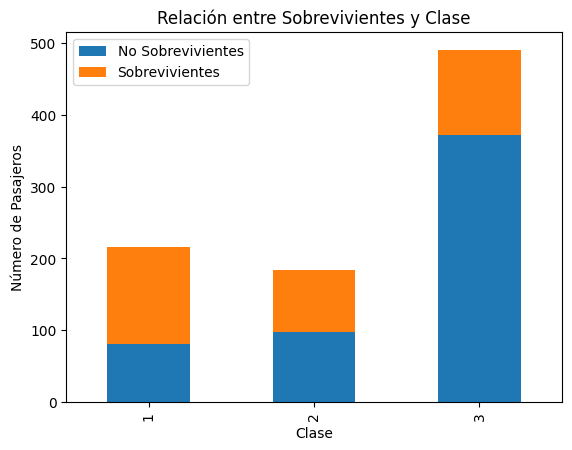

In [89]:
import matplotlib.pyplot as plt
# Agrupar por clase y sobrevivencia para contar la cantidad de sobrevivientes y no sobrevivientes
survival_by_class = oTrainData.groupby(['Pclass', 'Survived']).size().unstack()

# Crear la gráfica de barras
survival_by_class.plot(kind='bar', stacked=True)
plt.xlabel('Clase')
plt.ylabel('Número de Pasajeros')
plt.title('Relación entre Sobrevivientes y Clase')
plt.legend(['No Sobrevivientes', 'Sobrevivientes'])
plt.show()


Cantidad de personas que sobrevivieron, murieron y el total por clase social y género:
Survived      0   1  Total
Pclass Sex                
1      0     77  45    122
       1      3  91     94
2      0     91  17    108
       1      6  70     76
3      0    300  47    347
       1     72  72    144

Índice de supervivencia por clase social y género (redondeado):
Pclass  Sex
1       0      37
        1      97
2       0      16
        1      92
3       0      14
        1      50
dtype: int64


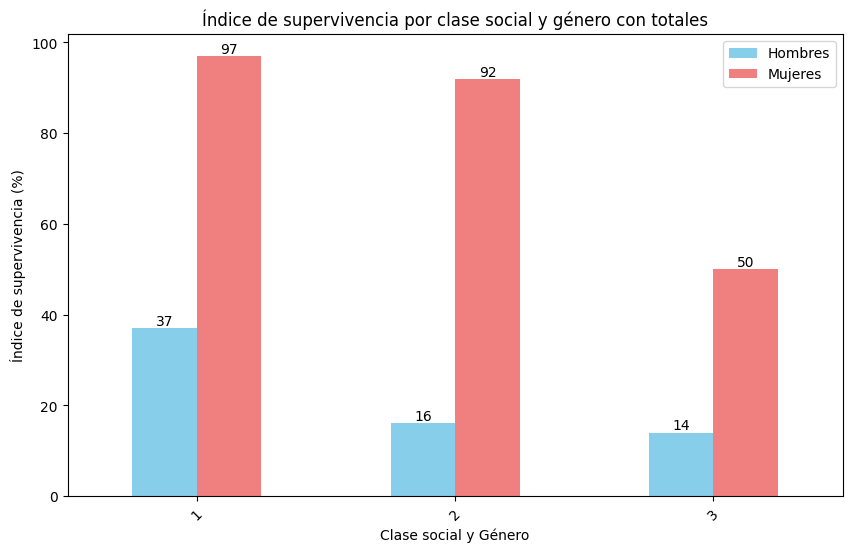

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
# Supervivencia vs Clase social y Género (Pclass, Sex)
survival_by_class_gender = oTrainData.groupby(['Pclass', 'Sex', 'Survived']).size().unstack()

# Calcular el total de personas en cada clase social y género
total_by_class_gender = survival_by_class_gender.sum(axis=1)

# Agregar el total al DataFrame survival_by_class_gender
survival_by_class_gender['Total'] = total_by_class_gender

# Mostrar la cantidad de personas que sobrevivieron, murieron y el total por clase social y género
print("Cantidad de personas que sobrevivieron, murieron y el total por clase social y género:")
print(survival_by_class_gender)

# Calcula el índice de supervivencia por clase social y género
survival_rate_by_class_gender = survival_by_class_gender[1] / survival_by_class_gender['Total']

# Redondear los índices de supervivencia a enteros (porcentaje)
survival_rate_by_class_gender_percent = (survival_rate_by_class_gender * 100).round().astype(int)

# Mostrar el índice de supervivencia por clase social y género en porcentaje
print("\nÍndice de supervivencia por clase social y género (redondeado):")
print(survival_rate_by_class_gender_percent)

# Graficar el índice de supervivencia por clase social y género
ax = survival_rate_by_class_gender_percent.unstack().plot(kind='bar', color=['skyblue', 'lightcoral'], figsize=(10, 6))

# Añadir las anotaciones con el índice de supervivencia redondeado
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Ajustar etiquetas y título
plt.xlabel('Clase social y Género')
plt.ylabel('Índice de supervivencia (%)')
plt.title('Índice de supervivencia por clase social y género con totales')
plt.xticks(rotation=45)
plt.legend(['Hombres', 'Mujeres'])

# Mostrar la gráfica
plt.show()


In [91]:
DataFrame = pd.DataFrame(survival_by_class_gender)
print("Cantidad de personas que sobrevivieron, murieron y el total por clase social y género:")
DataFrame.head()

Cantidad de personas que sobrevivieron, murieron y el total por clase social y género:


Survived      0   1  Total
Pclass Sex                
1      0     77  45    122
       1      3  91     94
2      0     91  17    108
       1      6  70     76
3      0    300  47    347

# Supervivencia vs Grupos de edad

<ipython-input-92-af080d706e4a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = oTrainData.groupby(['AgeGroup', 'Survived']).size().unstack()


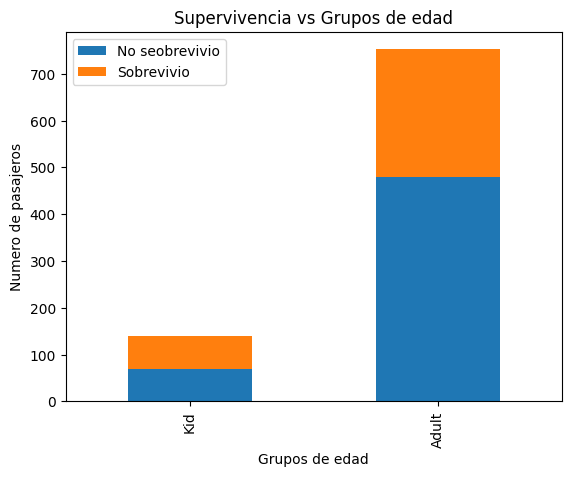

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
# Define las edades
oTrainData['AgeGroup'] = pd.cut(oTrainData['Age'], bins=[0, 18, 100], labels=['Kid', 'Adult'])

survival_by_age_group = oTrainData.groupby(['AgeGroup', 'Survived']).size().unstack()

survival_by_age_group.plot(kind='bar', stacked=True)
plt.xlabel('Grupos de edad')
plt.ylabel('Numero de pasajeros')
plt.title('Supervivencia vs Grupos de edad')
plt.legend(['No seobrevivio', 'Sobrevivio'])
plt.show()


Cantidad total, fallecidos y sobrevivientes por grupo de edad (desglosado por género):
          Total  Hombres Fallecidos  Hombres Sobrevivientes  Mujeres Fallecidas  Mujeres Sobrevivientes
AgeGroup                                                                                               
0-9          64                  14                      19                  12                      19
10-19       115                  59                      10                  12                      34
20-29       230                 126                      23                  20                      61
30-39       155                  77                      23                   9                      46
40-49        86                  43                      12                  10                      21
50-59        42                  24                       4                   1                      13
60-69        17                  13                       1                   0  

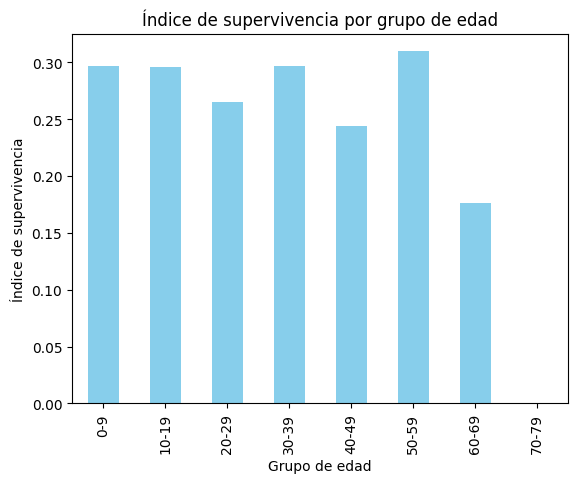

In [93]:
import pandas as pd

oTrainData = pd.read_csv('/content/train.csv')

# Limpiar datos: eliminar filas con edad faltante
oCleanData = oTrainData[~oTrainData['Age'].isnull()].copy()
oCleanData.index = range(len(oCleanData))

# Definir grupos de edad
oCleanData.loc[:, 'AgeGroup'] = pd.cut(oCleanData['Age'], bins=range(0, 101, 10), labels=[f"{i}-{i+9}" for i in range(0, 91, 10)])

# Mapear 'female' a 1 y 'male' a 0 en la columna 'Sex'
oCleanData.loc[:, 'Sex'] = oCleanData['Sex'].map({'female': 1, 'male': 0})

# Agrupar por grupo de edad, género y supervivencia
survival_by_age_gender = oCleanData.groupby(['AgeGroup', 'Sex', 'Survived'], observed=True).size().unstack(level=[1, 2], fill_value=0)
# Calcular el total de personas por grupo de edad
total_by_age_group = survival_by_age_gender.sum(axis=1)

# Crear una tabla que combine total, fallecidos y sobrevivientes desglosado por género
summary_by_age_gender = pd.DataFrame({
    'Total': total_by_age_group,
    'Hombres Fallecidos': survival_by_age_gender[(0, 0)],
    'Hombres Sobrevivientes': survival_by_age_gender[(0, 1)],
    'Mujeres Fallecidas': survival_by_age_gender[(1, 0)],
    'Mujeres Sobrevivientes': survival_by_age_gender[(1, 1)]
})

# Mostrar la tabla con el resumen
print("Cantidad total, fallecidos y sobrevivientes por grupo de edad (desglosado por género):")
print(summary_by_age_gender.to_string())

# Calcular el índice de supervivencia por grupo de edad
survival_rate_by_age_group = survival_by_age_gender[(1, 1)] / total_by_age_group

# Mostrar el índice de supervivencia por grupo de edad
print("\nÍndice de supervivencia por grupo de edad:")
print(survival_rate_by_age_group)

# Graficar el índice de supervivencia por grupo de edad
survival_rate_by_age_group.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo de edad')
plt.ylabel('Índice de supervivencia')
plt.title('Índice de supervivencia por grupo de edad')
plt.show()


# Survival vs family size (sibSp // Parch)

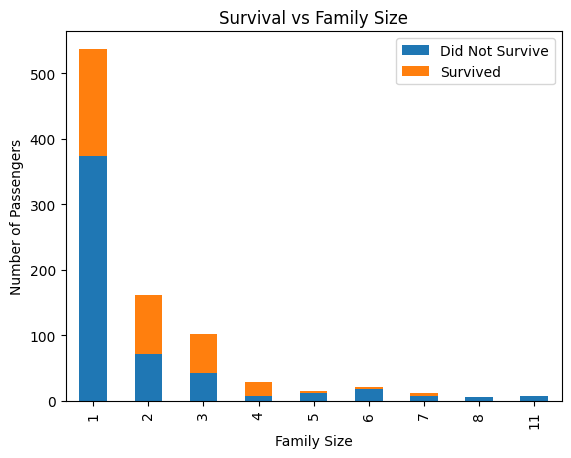

In [94]:
import matplotlib.pyplot as plt
# Create a new column for family size
oTrainData['FamilySize'] = oTrainData['SibSp'] + oTrainData['Parch'] + 1

# Group by family size and survival
survival_by_family_size = oTrainData.groupby(['FamilySize', 'Survived']).size().unstack()

# Plot bar chart
survival_by_family_size.plot(kind='bar', stacked=True)
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.title('Survival vs Family Size')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()


# Analisis de Indice de Supervivencia por genero y numero de familiares a bordo


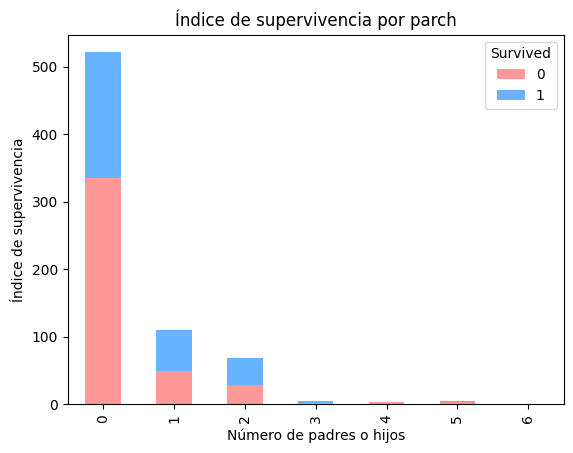

In [95]:
# Supervivencia vs Grupos de edad
survival_by_parch = oCleanData.groupby(['Parch', 'Survived']).size().unstack()

# Mostrar el índice de supervivencia por grupo de edad
total_by_parch = survival_by_parch.sum(axis=1)
survival_by_parch_index = survival_by_parch.div(total_by_parch, axis=0) * 100

# Graficar el índice de supervivencia por grupo de edad
survival_by_parch.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.xlabel('Número de padres o hijos')
plt.ylabel('Índice de supervivencia')
plt.title('Índice de supervivencia por parch')
plt.show()


In [96]:
survival_by_parch_df = pd.DataFrame(survival_by_parch)
print("Total de sobrevivientes por número de parch")
survival_by_parch_df.head()

Total de sobrevivientes por número de parch


Survived,0,1
Parch,,
0,335.0,186.0
1,49.0,61.0
2,29.0,39.0
3,2.0,3.0
4,4.0,NaN


In [97]:
survival_by_parch_df = pd.DataFrame(survival_by_parch_index)
print("Porcentaje de sobrevivientes por número de parch")
survival_by_parch_df.head()

Porcentaje de sobrevivientes por número de parch


Survived,0,1
Parch,,
0,64.299424,35.700576
1,44.545455,55.454545
2,42.647059,57.352941
3,40.000000,60.000000
4,100.000000,NaN


# Analisis de Indice de Supervivencia por genero y numero de hermanos y esposos a bordo

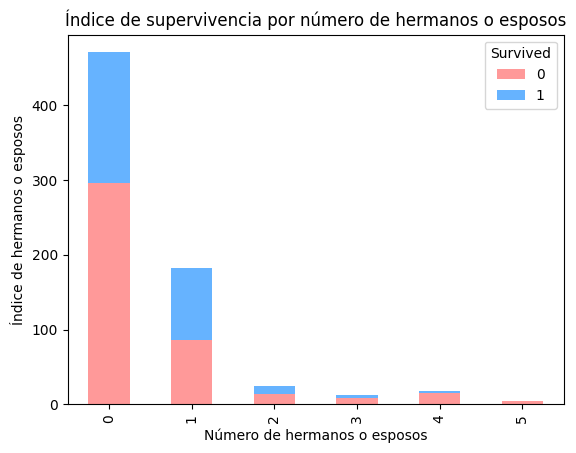

In [98]:
# Supervivencia vs Grupos de edad
survival_by_sibsp = oCleanData.groupby(['SibSp', 'Survived']).size().unstack()

# Mostrar el índice de supervivencia por grupo de edad
total_by_sibsp = survival_by_sibsp.sum(axis=1)
survival_by_sibsp_index = survival_by_sibsp.div(total_by_parch, axis=0) * 100

# Graficar el índice de supervivencia por grupo de edad
survival_by_sibsp.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.xlabel('Número de hermanos o esposos')
plt.ylabel('Índice de hermanos o esposos')
plt.title('Índice de supervivencia por número de hermanos o esposos')
plt.show()


In [99]:
survival_by_sibsp_df = pd.DataFrame(survival_by_sibsp)
print("Total de sobrevivientes por número de parch")
survival_by_sibsp_df.head()

Total de sobrevivientes por número de parch


Survived,0,1
SibSp,,
0,296.0,175.0
1,86.0,97.0
2,14.0,11.0
3,8.0,4.0
4,15.0,3.0


In [100]:
survival_by_sibsp_df = pd.DataFrame(survival_by_sibsp_index)
print("Porcentaje de sobrevivientes por número de parch")
survival_by_sibsp_df.head()

Porcentaje de sobrevivientes por número de parch


Survived,0,1
0,56.813820,33.589251
1,78.181818,88.181818
2,20.588235,16.176471
3,160.000000,80.000000
4,375.000000,75.000000
